<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Leitura-dos-Dados" data-toc-modified-id="Leitura-dos-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Leitura dos Dados</a></span></li><li><span><a href="#EDA:-Explorando-Insights" data-toc-modified-id="EDA:-Explorando-Insights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA: Explorando Insights</a></span><ul class="toc-item"><li><span><a href="#Overview-Geral-da-Base" data-toc-modified-id="Overview-Geral-da-Base-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Overview Geral da Base</a></span></li><li><span><a href="#Variáveis-de-Ambiente,-Espaço-e-Tempo" data-toc-modified-id="Variáveis-de-Ambiente,-Espaço-e-Tempo-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variáveis de Ambiente, Espaço e Tempo</a></span></li><li><span><a href="#Variáveis-de-Construção-do-Imóvel" data-toc-modified-id="Variáveis-de-Construção-do-Imóvel-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Variáveis de Construção do Imóvel</a></span></li><li><span><a href="#Variáveis-de-Localização-do-Imóvel" data-toc-modified-id="Variáveis-de-Localização-do-Imóvel-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Variáveis de Localização do Imóvel</a></span></li></ul></li><li><span><a href="#Prep:-Construção-de-Pipelines" data-toc-modified-id="Prep:-Construção-de-Pipelines-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prep: Construção de Pipelines</a></span><ul class="toc-item"><li><span><a href="#Pipeline-Inicial" data-toc-modified-id="Pipeline-Inicial-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pipeline Inicial</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Agrupamento-Categórico" data-toc-modified-id="Agrupamento-Categórico-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Agrupamento Categórico</a></span></li><li><span><a href="#Dados-Duplicados" data-toc-modified-id="Dados-Duplicados-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Dados Duplicados</a></span></li><li><span><a href="#Dados-de-Treino-e-de-Teste" data-toc-modified-id="Dados-de-Treino-e-de-Teste-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Dados de Treino e de Teste</a></span></li><li><span><a href="#Construindo-Pipeline-Inicial" data-toc-modified-id="Construindo-Pipeline-Inicial-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Construindo Pipeline Inicial</a></span></li></ul></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento referente a análise exploratória de insights relacionada ao dataset [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) retirado da plataforma Kaggle para aprimoramento de skills em Data Science e Machine Learning.

___
**_Descrição e contexto:_**
_Peça a um comprador de casas para descrever a casa dos seus sonhos e ele provavelmente não irá iniciar a descrição com a "altura do teto do porão" ou com a "proximidade com uma ferrovia leste-oeste". Entretanto, o conjunto de dados dessa competição prova que existem influencias na negociação de casas além do número de quartos ou banheiros. Com aproximadamente 80 variáveis explicativas descrevento praticamente todo e qualquer aspecto residencial de casas em Ames, Iowa, essa competição desafia o usuário a prever o preço final de casas._

Paralelamente, este notebook será essencial para a validação de novos desenvolvimentos atrelados ao pacote [pycomp](https://github.com/ThiagoPanini/pycomp), uma biblioteca caseira desenvolvida com o intuito de facilitar todos os passos relacionados a análise de dados, desde a exploração inicial envolvendo plotagens gráficas até o treinamento e aprimoramento de modelos preditivos.

    !pip install pycomp --upgrade --no-cache-dir

In [1]:
# Bibliotecas do projeto
import pandas as pd
import os
from datetime import datetime
from warnings import filterwarnings
filterwarnings('ignore')

# Variáveis do projeto
DATA_PATH = 'data/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

# Leitura dos Dados

Após a importação das principais bibliotecas comuns ao projeto e também da definição de variávies importantes para a leitura dos dados, é possível realizar o primeiro contato com a base de dados disponível para o desenvolvimento da tarefa.

In [2]:
# Lendo dados de treino
df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
print(f'Dimensões: {df.shape}')
df.head()

Dimensões: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Com a leitura dos dados, é possível consultar a página de [metadados](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) para extrair o significado de cada uma das 80 colunas disponíveis na base:

* **_1stFlrSF_**:	Área total do primeiro andar da moradia
* **_2ndFlrSF_**:	Área total do segundo andar da moradia
* **_3SsnPorch_**:	Área de varande de três temporadas (?)
* **_Alley_**:	Característica da viela que dá acesso a moradia
* **_BedroomAbvGr_**:	Quantidade de camas na moradia (acima do porão)
* **_BldgType_**:	Tipo de habitação
* **_BsmtCond_**:	Classifica condição geral do porão
* **_BsmtExposure_**:	Exposição do porão da moradia
* **_BsmtFinSF1_**:	Área coberta pelo acabamento do tipo 1 (atributo BsmtFinType1)
* **_BsmtFinSF2_**:	Área coberta pelo acabamento do tipo 2 (atributo BsmtFinType2)
* **_BsmtFinType1_**:	Score do acabamento da região relacionada ao porão
* **_BsmtFinType2_**:	Score do acabamento da região relacionada ao porão (se mais de um existir)
* **_BsmtFullBath_**:	Banheiros completos (full) da área relacionada ao porão
* **_BsmtHalfBath_**:	Banheiros incompletos (half) da área relacionada ao porão
* **_BsmtQual_**:	Classifica a moradia quanto ao tamanho do porão
* **_BsmtUnfSF_**:	Área do porão sem acabamento
* **_CentralAir_**:	Define se existe ou não um ar condicionado central (atributo booleano)
* **_Condition1_**:	Proximidade com pontos importantes da cidade
* **_Condition2_**:	Proximidade com pontos importantes da cidade (se houver mais de um)
* **_Electrical_**:	Tipo de sistema elétrico da casa
* **_EnclosedPorch_**:	Área de varanda fechada na moradia
* **_ExterCond_**:	Condição do material externo na data de observação
* **_Exterior1st_**:	Cobertura externa da casa
* **_Exterior2nd_**:	Cobertura externa da casa (se houver mais de uma cobertura)
* **_ExterQual_**:	Qualidade do material utilizado no exterior
* **_Fence_**:	Qualidade do cercado presente na moradia
* **_FireplaceQu_**:	Qualidade das lareiras
* **_Fireplaces_**:	Quantidade de lareiras da moradia
* **_Foundation_**:	Tipo de alicerce utilizado na construção
* **_FullBath_**:	Quantidade de banheiros completos na casa (acima do porão)
* **_Functional_**:	Descreve funcionalidades da casa sob garantia
* **_GarageArea_**:	Área da garagem em metros quadrados
* **_GarageCars_**:	Tamanho da garagem relacionado a quantidade de carros possíveis
* **_GarageCond_**:	Score que define as condições da garagem
* **_GarageFinish_**:	Acabamento interno da garagem
* **_GarageQual_**:	Qualidade da garagem
* **_GarageType_**:	Tipo de garagem da moradia
* **_GarageYrBlt_**:	Ano de construção da garagem
* **_GrLivArea_**:	Área total da sala de estar
* **_HalfBath_**:	Quantidade de banheiros incompletos (half) na casa (acima do porão)
* **_Heating_**:	Tipo de aquecimento da moradia
* **_HeatingQC_**:	Qualidade do aquecimento
* **_HouseStyle_**:	Estilo da habitação
* **_KitchenAbvGr_**:	Quantidade de cozinhas na moradia (acima do porão)
* **_KitchenQual_**:	Qualidade das cozinhas
* **_LandContour_**:	Nivelamento da moradia
* **_LandSlope_**:	Declive da propriedade
* **_LotArea_**:	Área do loteamento
* **_LotConfig_**:	Configuração do loteamento
* **_LotFrontage_**:	Dimensão do perímetro frontal da casa
* **_LotShape_**:	Formato geral da moradia
* **_LowQualFinSF_**:	Área total de acabamentos de baixa qualidade em toda a moradia
* **_MasVnrArea_**:	Área coberta pela alvenaria
* **_MasVnrType_**:	Tipo de alvenaria utilizada
* **_MiscFeature_**:	Algumas features não inclusas nas demais categorias
* **_MiscVal_**:	Valor das features não inclusas em critérios de quantidades
* **_MoSold_**:	Mês no qual a venda da moradia foi efetivada
* **_MSSubClass_**:	Identifica o tipo de moradia da residência
* **_MSZoning_**:	Classifica o imóvel por zona
* **_Neighborhood_**:	Localidade relacionada as fronteiras da cidade
* **_nome_variavel_**:	descricao
* **_OpenPorchSF_**:	Área de varanda aberta na moradia
* **_OverallCond_**:	Score da condição geral da moradia
* **_OverallQual_**:	Score do material e acabamento da moradia
* **_PavedDrive_**:	Atributo que define a pavimentação da rua (dentro da moradia)
* **_PoolArea_**:	Área de piscina presente na moradia
* **_PoolQC_**:	Qualidade da piscina
* **_RoodMatl_**:	Material utilizado na cobertura (telhado)
* **_RoofStyle_**:	Tipo de cobertura da casa (telhado)
* **_SaleCondition_**:	Condições da venda
* **_SaleType_**:	Tipo da venda
* **_ScreenPorch_**:	Área de tela na varanda da moradia
* **_Street_**:	Característica da rua que dá acesso a moradia
* **_TotalBsmtSF_**:	Área total do porão
* **_TotRmsAbvGrd_**:	Quantidade total de quartos na moradia (acima do porão)
* **_Utilities_**:	Serviços de utilidade pública
* **_WoodDeckSF_**:	Área do deck de madeira presente na moradia
* **_YearBuilt_**:	Ano de construção da casa
* **_YearRemodAdd_**:	Ano de remodelação da casa (mesmo que YearBuilt se a casa não foi remodelada)
* **_YrSold_**:	Ano no qual a venda da moradia foi efetivada

# EDA: Explorando Insights

Neste ponto, tem-se um contexto bem definido do objetivo do projeto, além de uma base de dados já lida e transformada em um formato DataFrame do pandas. A partir deste momento, será proposta uma verdadeira varredura nos dados para a aplicação de uma análise descritiva detalhada em prol do levantamento de insights relevantes para o contexto de negócio.

Utilizando o pacote caseiro [pycomp](https://github.com/ThiagoPanini/pycomp), cuja construção foi motivada exatamente para facilitar o trabalho de cientistas de dados nos pilares de insights, prep e modelagem, espera-se, dessa segunda sessão, um entendimento pleno sobre o conjunto de dados disponíveis e uma ideia clara sobre os passos necessários para serem aplicados no prep e na modelagem.

<img src="https://i.imgur.com/WcAaq1P.png" alt="pycomp Logo"></a>

## Overview Geral da Base

Este projeto possui uma particularidade: a presença de um número elevado de variáveis disponíveis para análise. Dessa forma, para que o projeto não fique extremamente extenso a partir da análise individual de cada uma das variáveis, é importante fornecer uma visão geral dos atributos presentes no conjunto de dados com alguns pontos relevantes que podem auxiliar futuras decisões de análise.

Para isso, será utilizada a função `data_overview()` que, por sua vez, executa uma série de análises úteis na base como um todo, retornando, por fim, características relevantes para cada um dos atributos presentes.

In [3]:
# Importando funções e definindo target
from pycomp.viz.insights import *

TARGET = 'SalePrice'

df_overview = data_overview(df=df, corr=True, target=TARGET)
print(f'Visualizando algumas variáveis e seus respectivos dados')
df_overview.head(25)

Visualizando algumas variáveis e seus respectivos dados


,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
0,PoolQC,1453,0.995205,object,3,NaN
1,MiscFeature,1406,0.963014,object,4,NaN
2,Alley,1369,0.937671,object,2,NaN
3,Fence,1179,0.807534,object,4,NaN
4,FireplaceQu,690,0.472603,object,5,NaN
5,LotFrontage,259,0.177397,float64,0,0.351799
6,GarageYrBlt,81,0.055479,float64,0,0.486362
7,GarageCond,81,0.055479,object,5,NaN
8,GarageType,81,0.055479,object,6,NaN
9,GarageFinish,81,0.055479,object,3,NaN


Ao executar a função `data_overview()`, é possível retornar, para cada um dos atributos, as seguintes informações:

* **_qtd_null_**: quantidade de dados nulos presentes na respectiva coluna;
* **_pct_null_**: percentual de dados nulos da respectiva coluna;
* **_dtype_**: tipo primitivo relacionado a coluna;
* **_qtd_cat_**: quantidade de categorias distintas (no caso de variáveis categóricas);
* **_target_pearson_corr_**: correlação com a variável target.

Dessa forma, é possível perceber algumas particularidades interessantes:

* A variável `PoolQC` possui 99.5% de entradas nulas na base. Na prática, essa variável indica a qualidade da piscina presente no imóvel e, dados nulos provavalmente indicam que o imóvel não possui piscina;
* As variáveis `MiscFeature`, `Alley` e `Fence` também possuem uma alta quantidade de dados nulos. Na prática, assim como em `PoolQC`, essas variáveis descrevem características específicas e particulares dos imóveis, o que, de fato, pode não estar presente na grande maioria das casas;
* Observando a lista ordenada por quantidade de dados nulos, é possível notar que as variáveis `GarageYrBlt`, `MasVnrArea` e `Fireplaces` possuem altas correlações com a variável target (`SalePrice`) e este pode ser um bom fator investigativo no futuro

In [4]:
# Principais variáveis por quantidade de entradas categóricas
df_overview.sort_values(by='qtd_cat', ascending=False).head()

,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
53,Neighborhood,0,0.0,object,25,NaN
77,Exterior2nd,0,0.0,object,16,NaN
78,Exterior1st,0,0.0,object,15,NaN
52,Condition1,0,0.0,object,9,NaN
42,SaleType,0,0.0,object,9,NaN


In [5]:
# Principais variáveis por correlação positiva
df_overview.sort_values(by='target_pearson_corr', ascending=False).head()

,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
80,SalePrice,0,0.0,int64,0,1.000000
48,OverallQual,0,0.0,int64,0,0.790982
30,GrLivArea,0,0.0,int64,0,0.708624
29,GarageCars,0,0.0,int64,0,0.640409
31,GarageArea,0,0.0,int64,0,0.623431


Os dois conjuntos acima mostram as principais variáveis por:
1. Quantidade de entradas categóricas
2. Maior correlação positiva com a variável target

Estes dois cenários permitem analisar com maior profundido os possíveis passos a serem consideradas na etapa de Prep da base de dados. Por exemplo, é preciso considerar que a variável `Neighborhood`, ao receber o procedimento de `encoding`, irá gerar 26 colunas adicionais na base final.

## Variáveis de Ambiente, Espaço e Tempo

Após uma análise inicial nas variáveis presentes na base como um todo, é importante definir os próximos passos de exploração dos dados frente a grande quantidade de features presentes. Dessa forma, a estratégia adotada é a categorização das colunas da base em três diferentes contextos:

* **_Variáveis de Ambiente, Espaço e Tempo_**: estudo em variáveis que descrevem situações do imóvel em termos de ambiente, espaço e tempo.;
* **_Variáveis de Construção_**: insights retirados de variáveis que indicam características de construção do imóvel;
* **_Variáveis de Localização_**: análises gráficas em variáveis que trazem informações relacionadas a localização do imóvel.

Nesta sessão, serão analisadas as variáveis relacionadas a "Espaço e Ambiente", criando conjuntos específicos de features e realizando plotagens gráficas de modo a verificar características estatísticas das features e suas respectivas relações com a variável target.

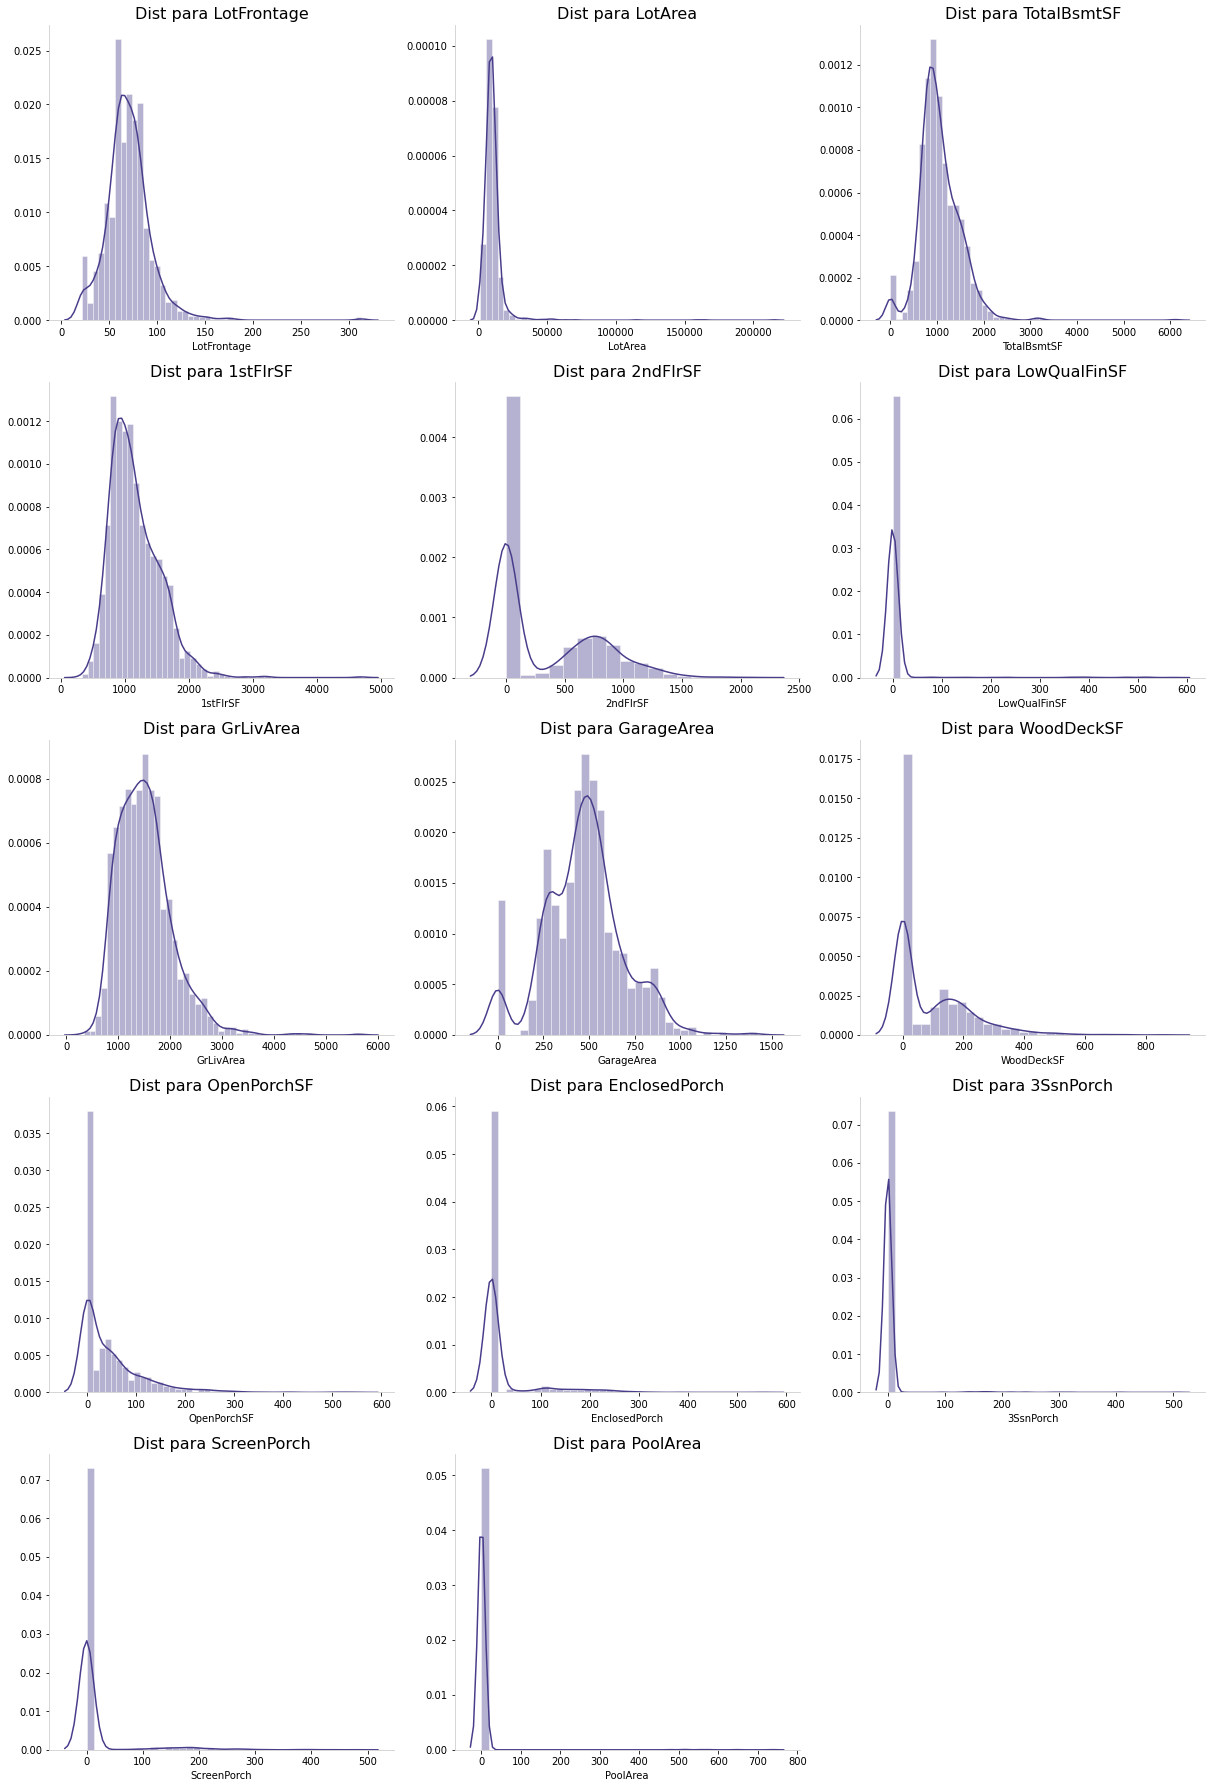

In [6]:
# Separando variáveis de espaço
space_cols = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 
              'BsmtQual', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 
              'GarageType', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 
              'LowQualFinSF', 'MoSold', 'OpenPorchSF', 'PoolArea', 'SaleCondition', 'SaleType',
              'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YrSold']

# Variáveis numéricas de espaço com significado contínuo
num_space_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea']

# Variáveis numéricas de espaço com significado discreto
cat_space_cols = ['BsmtQual', 'GarageType', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'BsmtHalfBath',
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                  'GarageCars', 'MoSold', 'YrSold']

# Plotando distribuição das variáveis contínuas de espaço e ambiente
plot_multiple_distplots(df=df, col_list=num_space_cols, kind='dist')

A figura de plotagem acima, gerada pela função `plot_multiple_distplot()` do módulo `pycomp.viz.insights`, consolida gráficos de distribuição para um set específico de variáveis contínuas dentro do contexto de "Espaço e Ambiente" dos imóveis. Nela, é possível visualizar como algumas features se comportam dentro do dataset proposto e, entre as conclusões possíveis, é possível pontuar:

* As variáveis `LotFrontage`, `TotalBsmtSF`, `1stFlrSF` e `GrLivArea` possuem distribuições que se assemelham a distribuição normal gaussiana, permitindo assim a retirada de conclusões visuais claras de parâmetros estatísticos específicos (como a média, desvio padrão, entre outros);
* Algumas outras variáveis, como por exemplo, `LowQualFnSF`, `EnclosedPorch`, `ScreenPorch` e `PoolArea` possuem distribuições semelhantes a variáveis discretas, contendo altos picos em valores 0 (ou próximo a 0).

Para complementar essa análise e adicionar uma visualização que permita analisar a relação de algumas variáveis com a variável target (`SalePrice`), é possível executar a função `plot_multiple_dist_scatterplot()`.

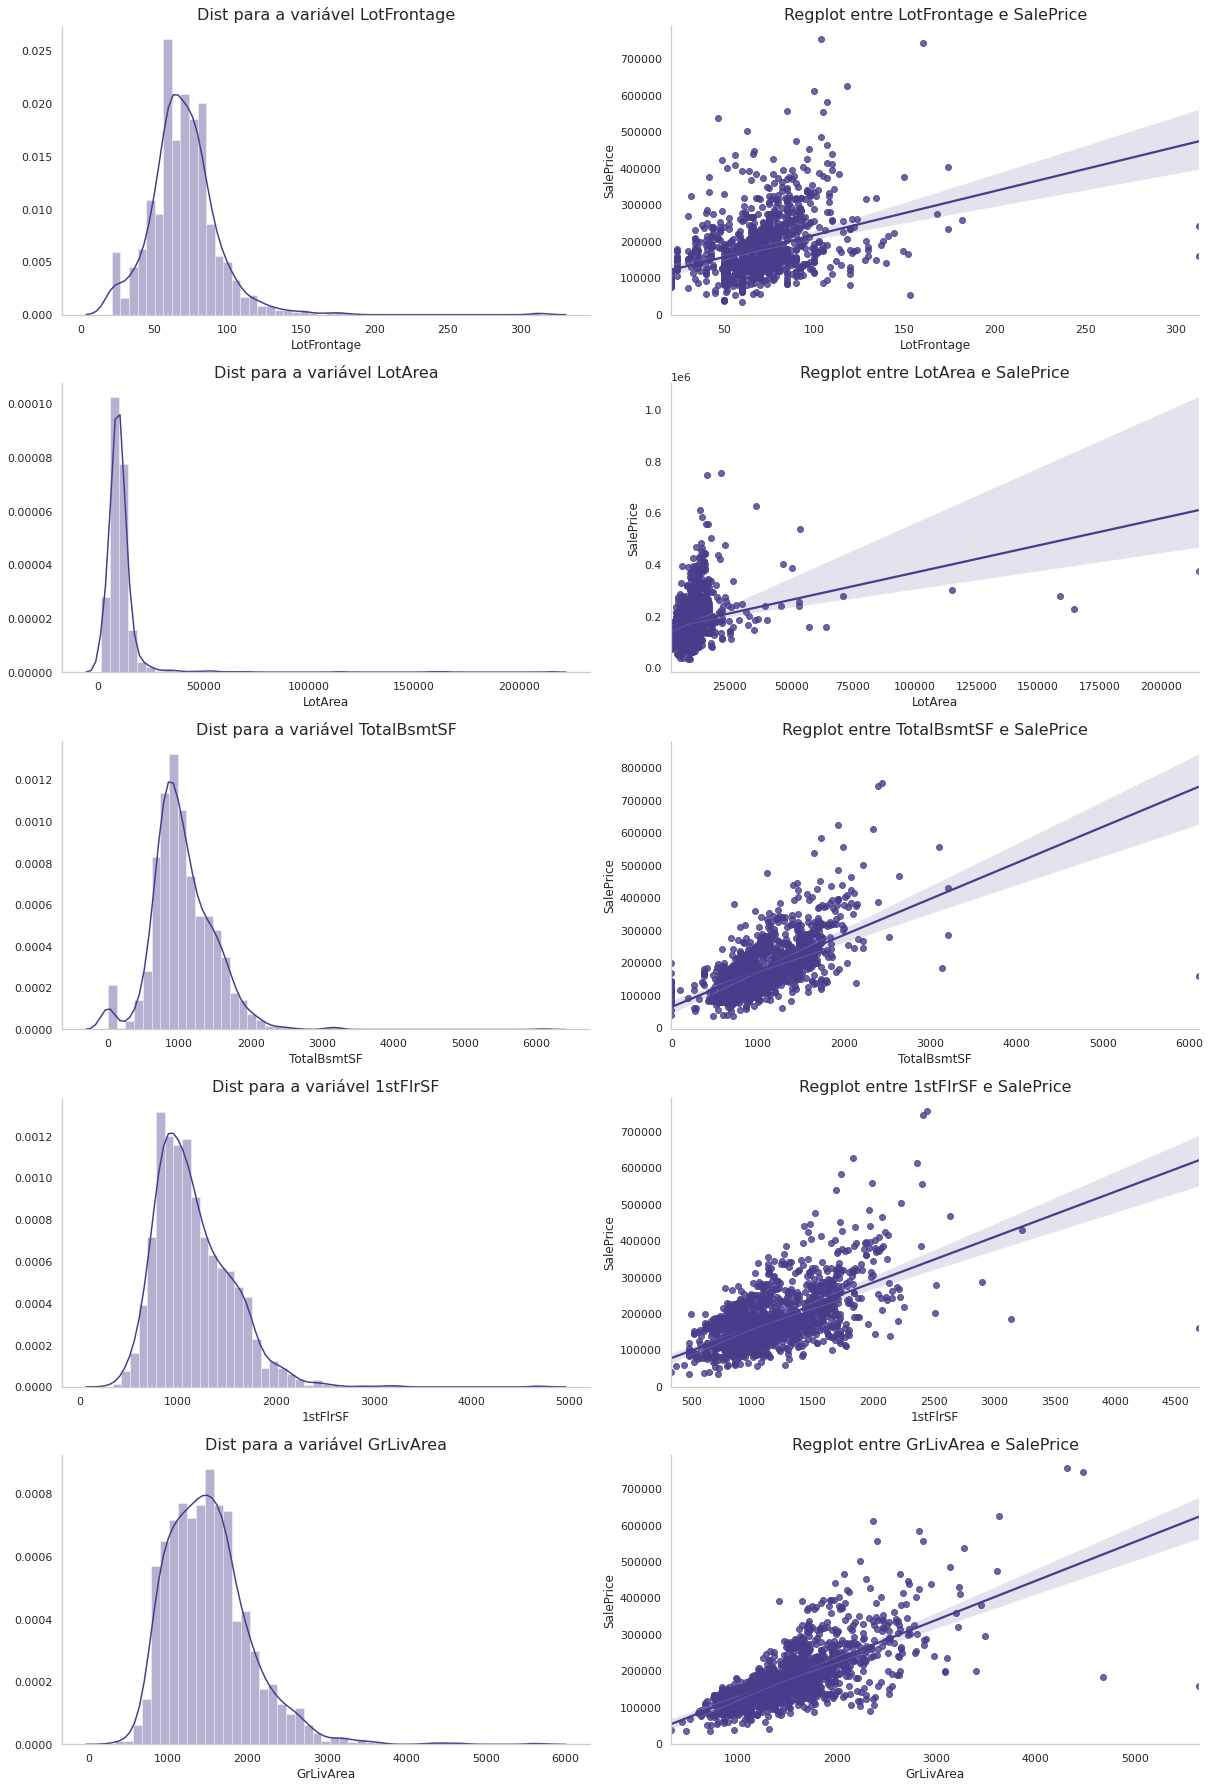

In [7]:
normal_dist_num_space_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
plot_multiple_dist_scatterplot(df=df, col_list=normal_dist_num_space_cols, y_col='SalePrice')

Através da análise da plotagem acima, é possível perceber algumas correlações interessantes entre as variáveis selecionadas e o respectivo preço do imóvel registrado. Em todos os casos observados, existe uma correlação positiva, indicando que a variável target e cada uma das variáveis acima selecionadas possuem uma relação diretamente proporcional. Na prática, essas variáveis indicam informações relacionadas a **área** de ambientes (lote, porão, terreno, garagem, entre outras), permitindo assim uma conclusão direta e genérica: "quanto maior o ambiente, mais caro o imóvel".

Essa visualização é de extrema importância pois, dado o comportamento acima observado, é possível afirmar que essas variáveis podem ter uma boa influência durante a fase de treinamento de um modelo preditivo. Uma outra forma de visualizar essa relação é a partir de uma matriz de correlação, ao qual será analisada futuramente, após a etapa de preparação dos dados.

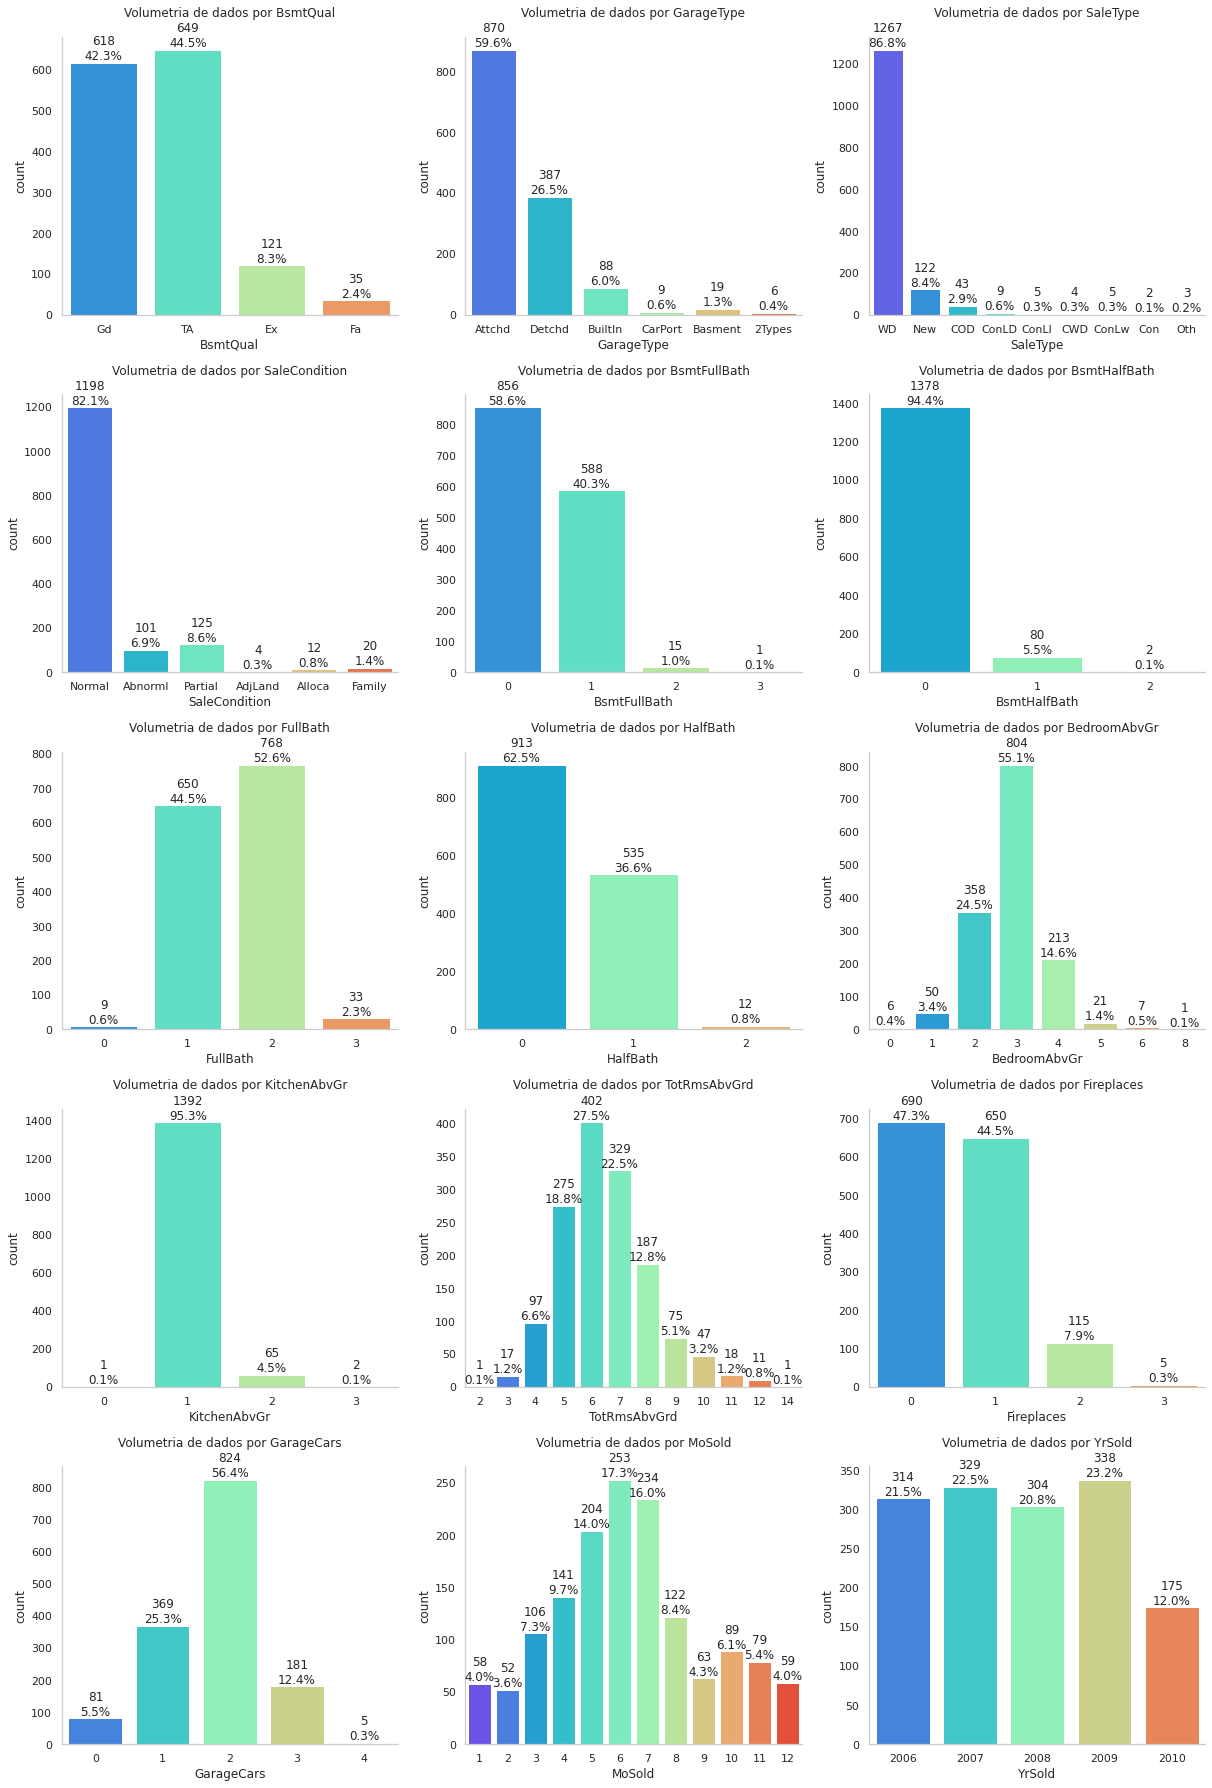

In [8]:
plot_multiple_countplots(df=df, col_list=cat_space_cols, orient='v')

A figura de plotagem acima, gerada pela função `plot_multiple_countplots()` do módulo `pycomp.viz.insights`, traz um overview geral das volumetrias atreladas a cada uma das entradas de algumas variáveis de ambiente e espaço classificadas como categóricas. Apesar da grande quantidade de visões atreladas, é possível extrair alguns insights relevantes, como por exemplo:

* Existe uma tendência histórica maior de vendas nos meses 5, 6 e 7 que pode ser visualizada na plotagem de volumetria para a variável `MoSold`;
* A maioria dos imóveis presentes na base possuem garagem para 2 carros, fato que pode ser constatado pela plotagem por `GarageCars`;
* A maioria das casa não possuem lareira, porém uma parcela relevante possui pelo menos 1 lareira (análise por `Fireplaces`.

Semelhante ao realizado acima com a função `plot_multiple_dist_scatterplot()`, a visão abaixo tem por objetivo analisar graficamente os dados de algumas variáveis e relacioná-los a uma variável target, extraindo indicadores estastísticos como média, mediana, desvio padrão, entre outros.

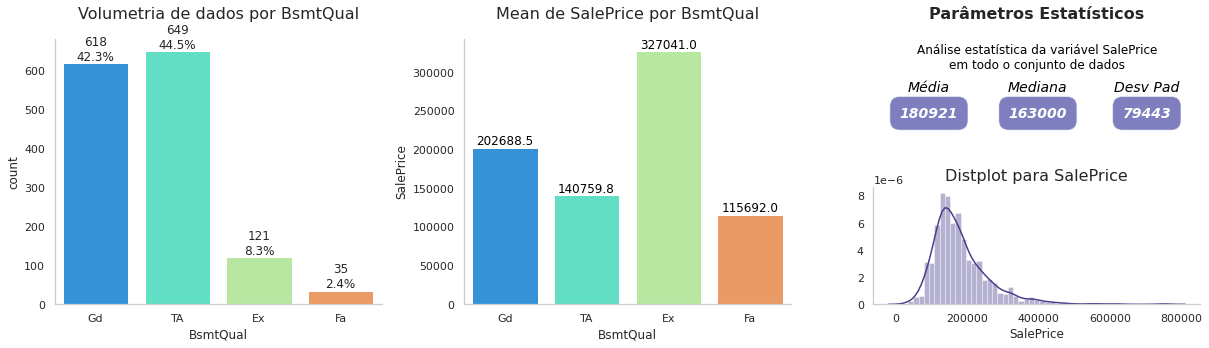

In [9]:
plot_cat_aggreg_report(df=df, cat_col='BsmtQual', value_col=TARGET)

Acima, é possível visualizar o resultado da execução da função `plot_caat_aggreg_report()`, sendo esta construída para proporcionar uma análise completa envolvendo uma coluna _categórica_ e uma coluna _numérica_, analisando as volumetrias envolvidas e os principais parâmetros estatísticos (como média, mediana e desvio padrão).

Dessa forma, é possível visualizar os resultados da variável categórica `BsmtQual` que, por sua vez, traz uma relação discreta da qualidade do porão, com a variável `SalePrice`, representando o preço real do imóvel. Com isso, é possível pontuar:

1. A maioria das casas possuem qualidades `TA` e `Gd` para os porões;
2. Imóveis com porões de qualidade `Ex` possuem a maior média de preços;
3. A média de preço de imóveis com porões `Ex` e `Gd` são maiores que a média geral da base.

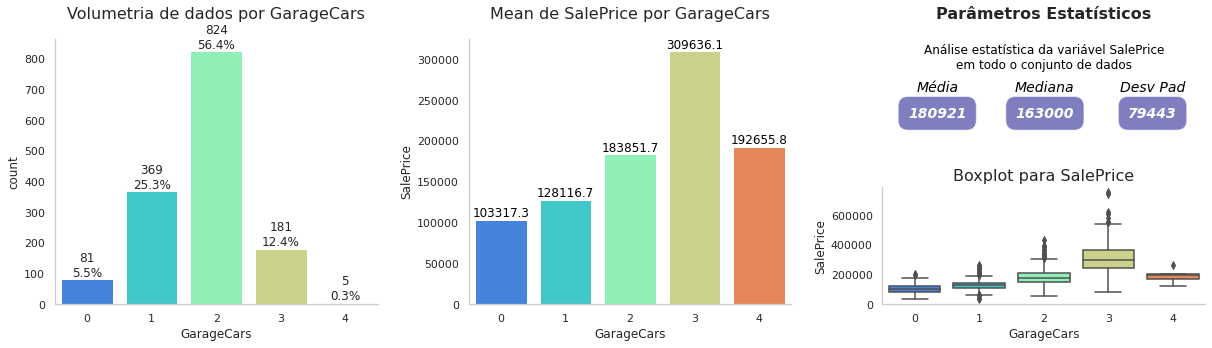

In [10]:
plot_cat_aggreg_report(df=df, cat_col='GarageCars', value_col=TARGET, dist_kind='box')

Acima, podemos visualizar uma relação entre `GarageCars` (espaço para carros na garagem) e `SalePrice`. O report nos mostra que, apesar da maioria dos imóveis possuírem espaço para 2 carros na garagem, a maior média de preços está associada àqueles que possuem espaço para 3 carros.

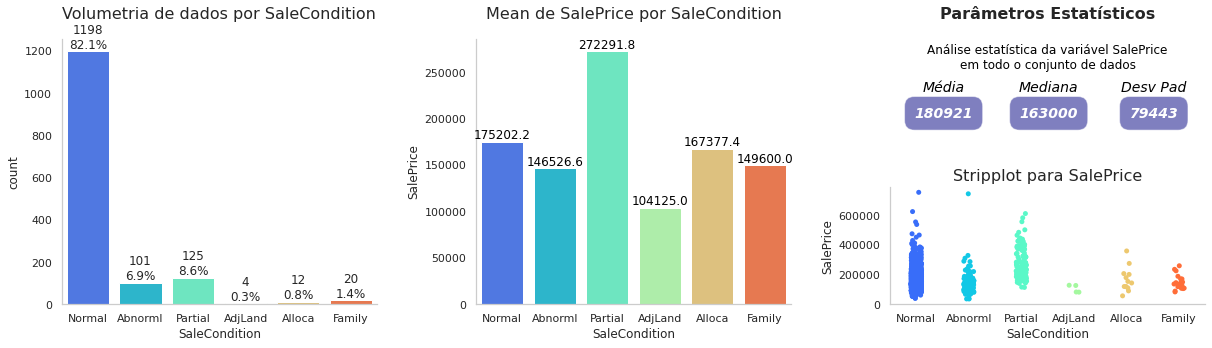

In [11]:
plot_cat_aggreg_report(df=df, cat_col='SaleCondition', value_col=TARGET, dist_kind='strip')

Em uma combinação de análise, é possível verificar o report gerado para as variáveis `SaleCondition` e `SalePrice`. Nele, percebe-se que grande parte das casas foram vendidas sob a condição "Normal", enquanto a maior média de preços de imóveis são oriundos de vendas sob a condição "Partial".

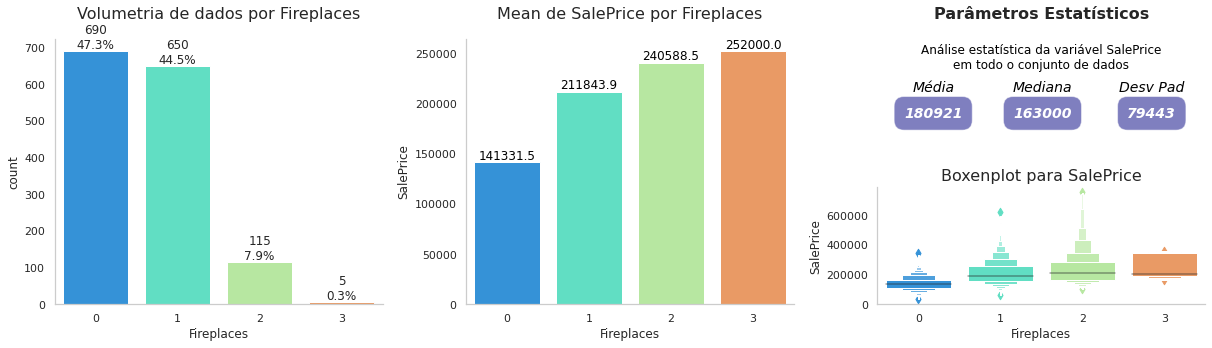

In [12]:
plot_cat_aggreg_report(df=df, cat_col='Fireplaces', value_col=TARGET, dist_kind='boxen')

Por fim, uma outra análise relevante colocada acima é a relação entre `Fireplaces` e o preço de imóveis. Aqui percebe-se uma clara tendência entre o número de lareiras presentes na casa e seu respectivo preço. Apesar de minoria, imóiveis com 5 lareiras possuem a maior média de preços da base.

___

Seria relevante, dentro da proposta de exploração desse conjunto de features, visualizar uma relação de preços de imóveis ao longo do tempo. Na base disponível para análise e, mais especificamente existem duas colunas `MoSold` e `YrSold`. Neste momento, temos a possibilidade de construir uma coluna personalizada concatenando o ano (`YrSold`) e o mês (`MoSold`) de venda do imóvel, gerando assim a possibilidade de analisar a evolução de vendas ao longo do tempo.

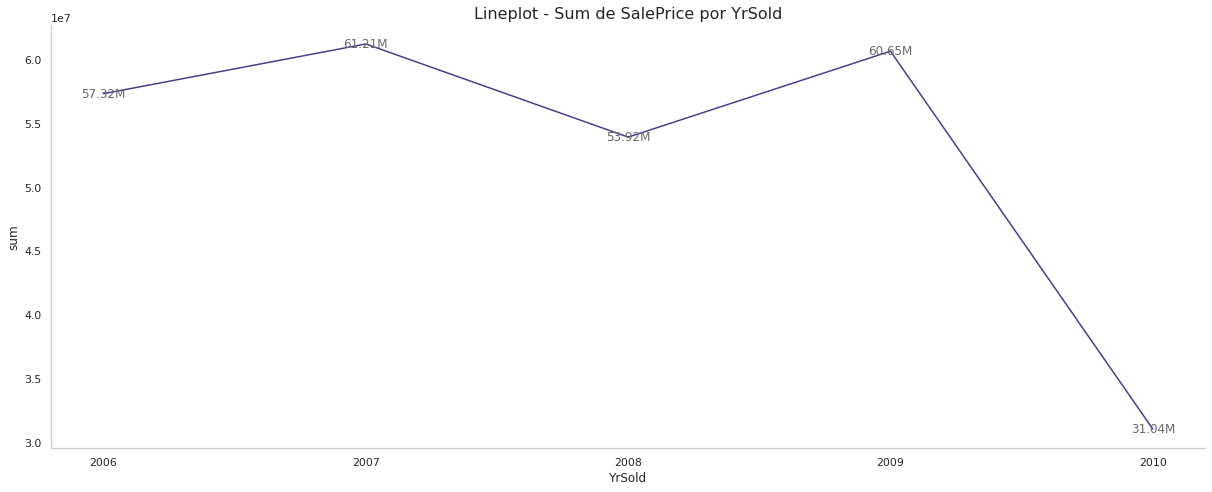

In [13]:
plot_evolutionplot(df=df, x='YrSold', y='SalePrice', agg_type='sum', date_col=False, x_rot=0, 
                   label_aggreg='M')

Com a função `plot_evolutionplot()` do pacote `pycomp` foi possível plotar, logo acima, uma visão histórica evolutiva de soma total de valores de imóveis ao longo dos **anos**. Assim, é possível perceber as variações pertinentes a cada época, sendo possível concluir que o ano de 2007 provavelmente foi o melhor em termos de valores imobiliários. Adicionalmente, é possível perceber que provavelmente o ano de 2010 não possui um fechamento completamento, o que explica o baixo valor registrado pra esse ano.

Entre os argumentos da função `plot_evolutionplot()`, é possível especificar novas quebras ou novas colunas de análise evolutiva a serem plotadas no eixo x. Dessa forma, vamos visualizar, abaixo, um gráfico de soma de preços de imóveis por mês.

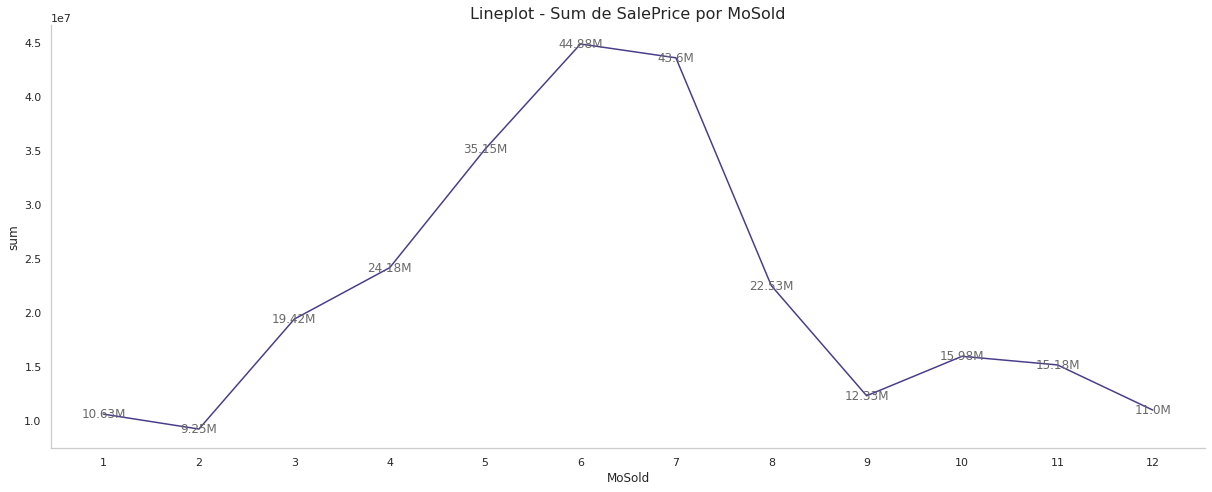

In [14]:
plot_evolutionplot(df=df, x='MoSold', y='SalePrice', agg_type='sum', date_col=False, x_rot=0, 
                   label_aggreg='M')

Utilizando a coluna `MoSold` da base, é possível visualizar uma soma total de preços de imóveis para cada um dos meses registrados. Dessa forma é possível concluir alguns pontos importantes e relevantes para o contexto de negócio ao qual estamos inseridos:

1. Existe um crescimento natural de vendas de imóveis entre os meses 5 e 7
2. Os primeiros e os últimos meses do ano não são os melhores para o setor imobiliário

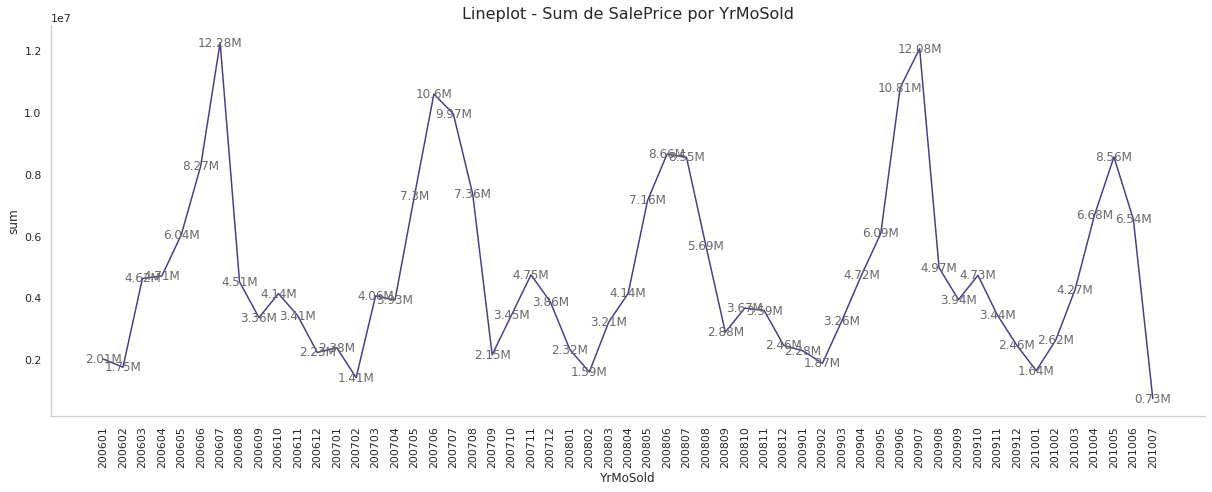

In [15]:
df['YrMoSold'] = (df['YrSold'] * 100 + df['MoSold'])
plot_evolutionplot(df=df, x='YrMoSold', y='SalePrice', agg_type='sum', date_col=False, label_aggreg='M')

Finalizando esse conjunto de análises evolutivas por soma total de preços, temos uma análise totalmente histórica que une as colunas `YrSold` e `MoSold` em uma única: a coluna customizada `YrMoSold` que, por sua vez, traz uma referência única de ano e mês de venda do imóvel. A partir da análise histórica nessa coluna, é possível notar todas as flutuações envolvendo a época inteira da base. Um ponto interessante a ser vitado são os picos de vendas presentes em 2009 e 200606. Outro fator interessante é a presença de uma espécie de "padrão" de mercado em relação a vendas de imóveis: a curva caraterística parece se repetir ano a ano em termos de preços e vendas.

Ainda dentro da função `plot_evolutionplot()`, é possível enriqueecer essa análise histórica a partir do argumento `hue` da função. Com ele, é possível selecionar quebras diferentes para verificar a linha histórica para cada entrada categórica. No gráfico abaixo, iremos analisar uma "média" de preços de casas pela variável `SaleCondition`

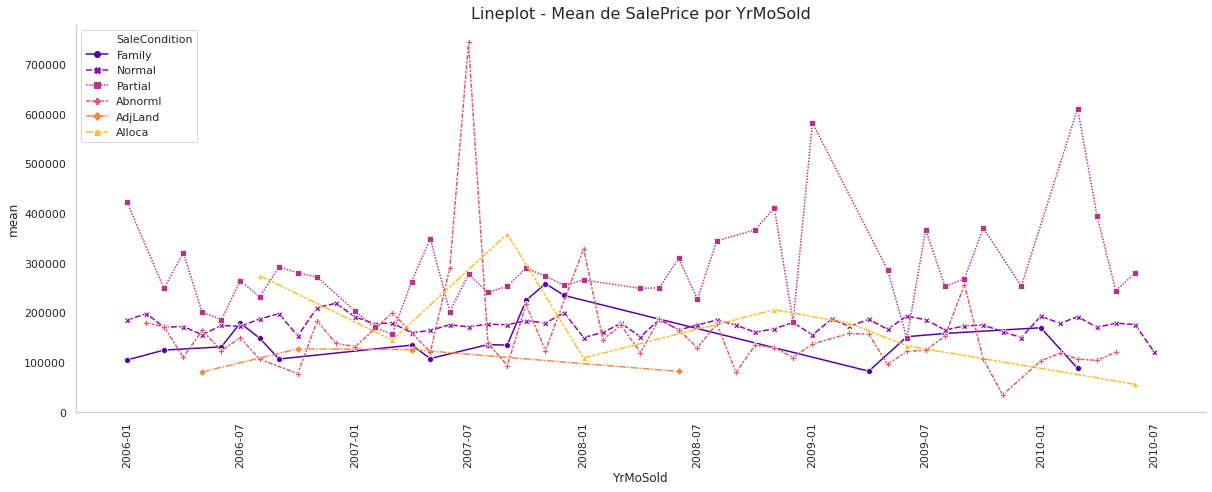

In [16]:
plot_evolutionplot(df=df, x='YrMoSold', y='SalePrice', hue='SaleCondition', agg_type='mean', 
                   label_data=False, style='SaleCondition', palette='plasma')

O gráfico acima nos mostra a evolução da venda de imóveis a partir da condição registrada para o dado imóvel. É interessante citar como a evolução de imóveis classificados como `Partial` cresceram ao longo dos últimos meses de registro. Outro ponto interessante é pico de vendas de imóveis classificados como `Abnorml` em 2007-07, seguido de um acentuado decréscimo no mês seguinte.

Abaixo, vamos plotar uma visão semelhante de evolução, porém considerando uma quebra por `Fireplaces`. Vejamos como as lareiras influenciaram a venda de imóveis ao longo do tempo.

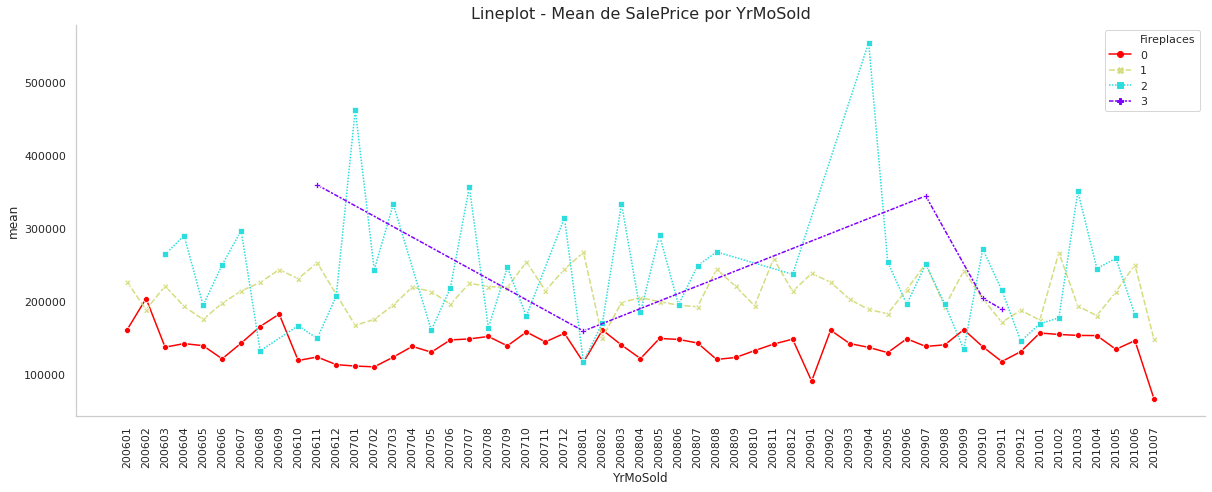

In [17]:
plot_evolutionplot(df=df, x='YrMoSold', y='SalePrice', hue='Fireplaces', agg_type='mean', 
                   date_col=False, label_data=False, style='Fireplaces')

O gráfico acima nos mostra uma média de preços de imóveis por quantidade de lareiras presentes. Nele, é possível visualizar claramente como as casas que não possuem lareira (linha vermelha) realmente possuem um menor preço médio de vendas. Do outro lado do espectro, as casas que possuem 2 lareiras são aquelas com maior preço médio registrado. Esporadicamente, temos alguns meses de vendas de imóveis com 3 lareiras, sempre com um preço elevado (análise prejudicada pela baixa quantidade de imóveis desse tipo).

## Variáveis de Construção do Imóvel

Após uma análise relevante nas variáveis classificadas no grupo de "Ambiente, Espaço e Tempo" dos imóveis, vamos propor um estudo aprofundado nas features do grupo de "Construção" dos imóveis. Nessa sessão, vamos investigar as principais variáveis presentes nesse grupo e suas respectivas relevâncias em relação ao preço registrado no imóvel.

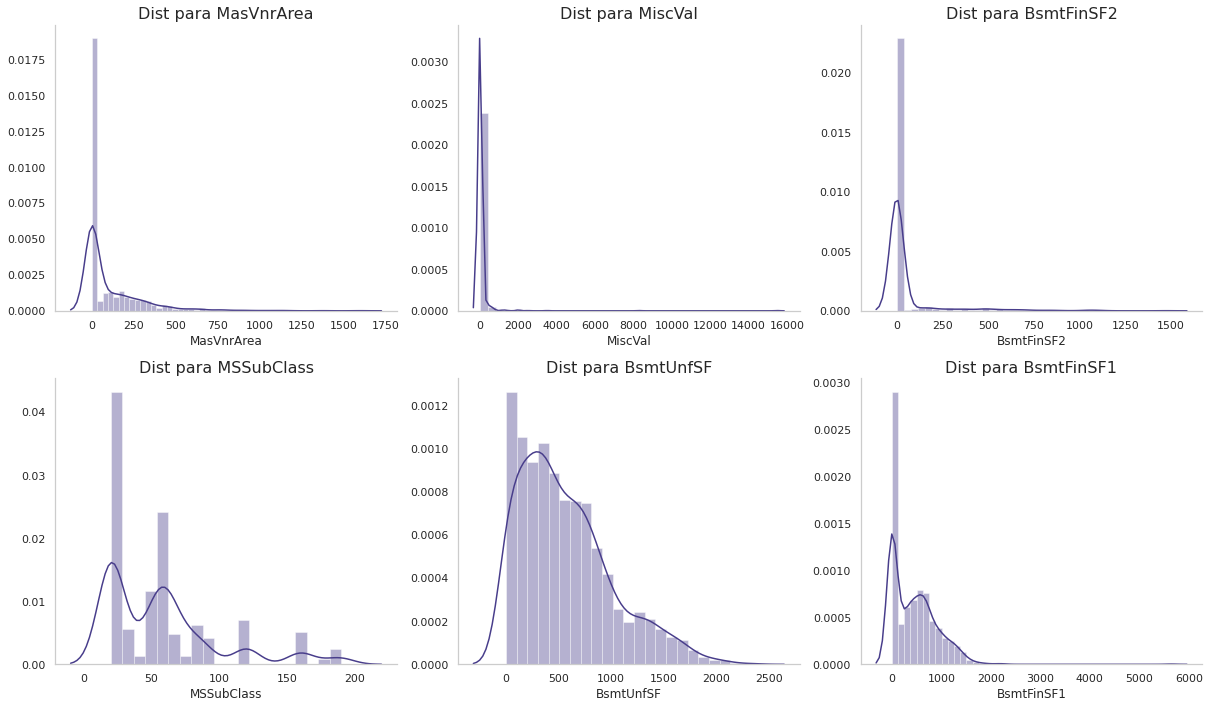

In [18]:
# Separando variáveis de construção
building_cols = ['MSSubClass', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                 'LandSlope', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 
                 'YearRemodAdd', 'RoofStyle', 'RoodMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure',
                 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
                 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                 'Fence', 'MiscFeature', 'MiscVal']

# Variáveis numéricas de construção com significado contínuo
num_building_cols = ['MasVnrArea', 'MiscVal', 'BsmtFinSF2', 'MSSubClass', 'BsmtUnfSF', 'BsmtFinSF1']

# Variáveis numéricas de construção com significado discreto
cat_building_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish',
                  'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
                  'Electrical', 'Functional', 'KitchenQual', 'PavedDrive', 'HeatingQC', 'LandSlope',
                  'HouseStyle', 'BldgType', 'LotConfig', 'Utilities', 'LandContour', 'LotShape',
                  'Street', 'CentralAir', 'Heating', 'RoofStyle', 'Foundation', 'ExterCond', 'ExterQual',
                  'Exterior2nd', 'Exterior1st', 'OverallQual', 'OverallCond', 'YearRemodAdd',
                  'GarageYrBlt', 'YearBuilt']

# Plotando distribuição das variáveis contínuas de construção
plot_multiple_distplots(df=df, col_list=num_building_cols, kind='dist')

A sequência de gráficos acima traz uma visão de distribuição para algumas variáveis classificadas como variáveis de "Construção" de imóveis. Nesse grupo, é possível encontrar poucas variáveis numéricas, sendo estas relacionadas a _área_ do imóvel ou a algum indicador vinculado a _qualidade_ do mesmo.

Na visão abaixo, vamos propor uma visão mais ampla sobre as variáveis de _construção_ através de uma plotagem categórica de volumetrias.

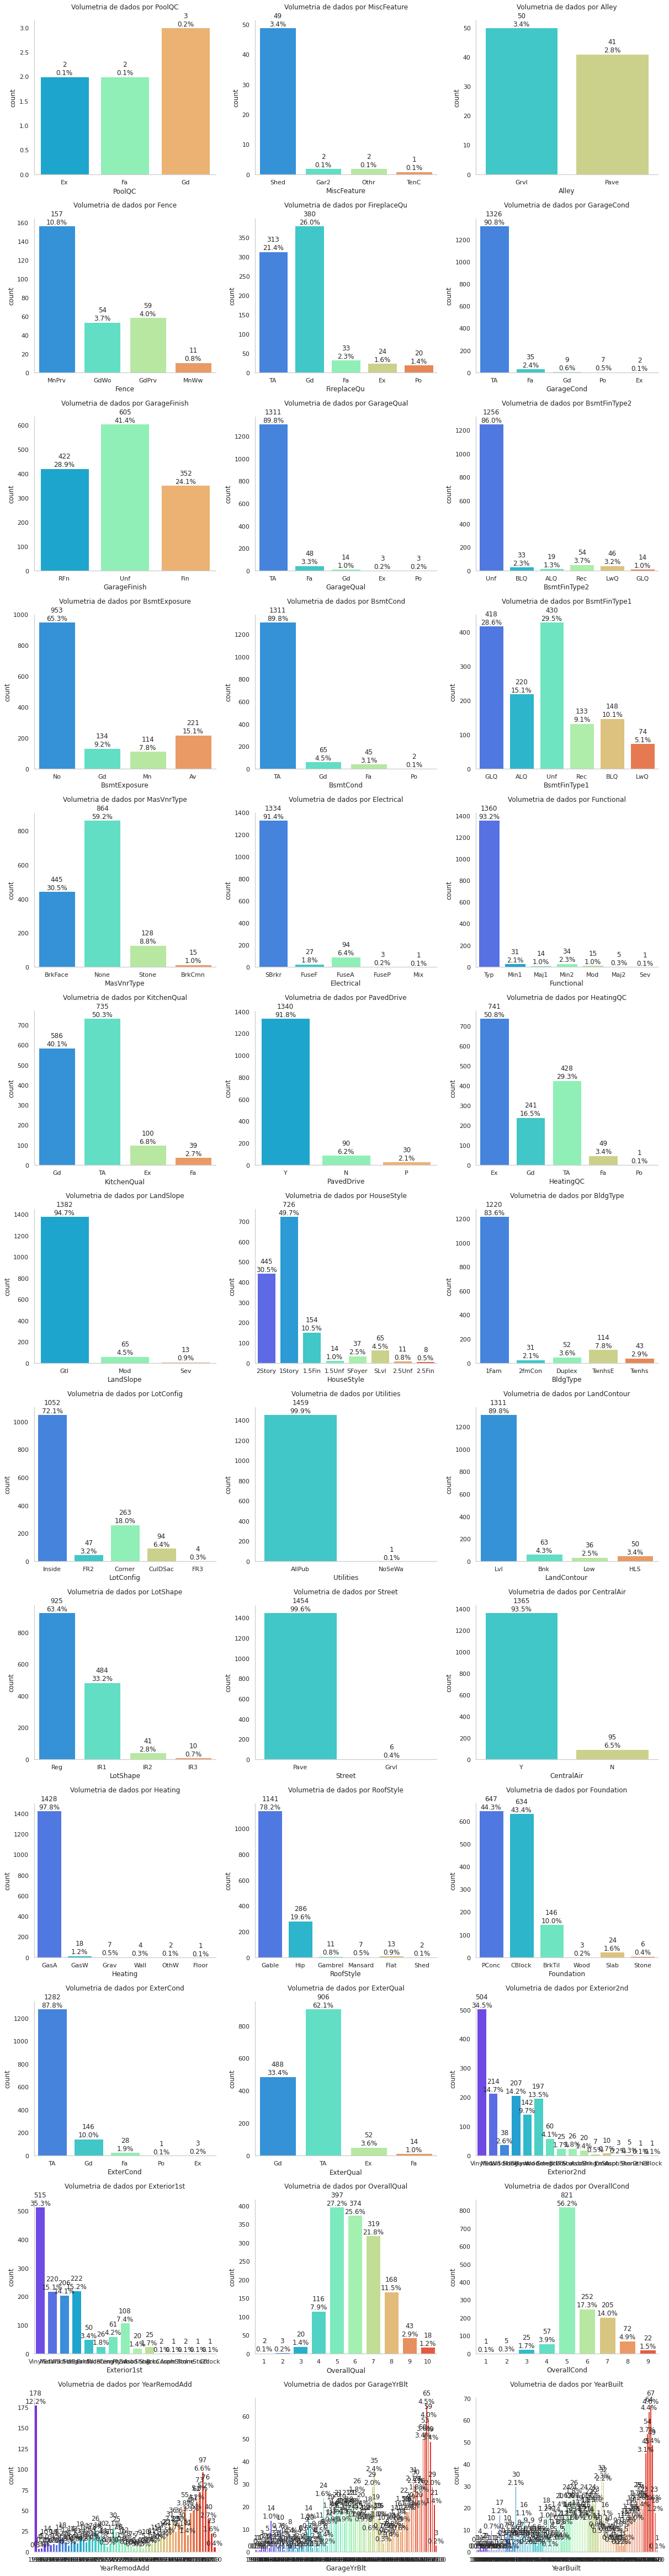

In [19]:
# Análise categórica das colunas
plot_multiple_countplots(df=df, col_list=cat_building_cols)

Na visão categórica de múltiplas colunas, é possível analisar exatamente o contexto relacionado as variáveis de construção. Muitas das features nesse grupo indicam algum critério de _qualidade_ do imóvel, do acabamento do porão até a parte externa. Algumas das variáveis possuem um número extremamente grande de categorias como, por exemplo, o ano de construção da garagem e o tipo do piso exterior do segundo andar.

É importante citar que, durante as fases de preparação da base para o treinamento de um modelo preditivo, será possível aplicar processos de `encoding` para tratar entradas categóricas e separá-las em colunas. Isso provavelmente irá criar um número extremamente elevado de features na base, fato este que pode ser tratado a partir de procedimentos de `feature selection` embutidos em pipelines

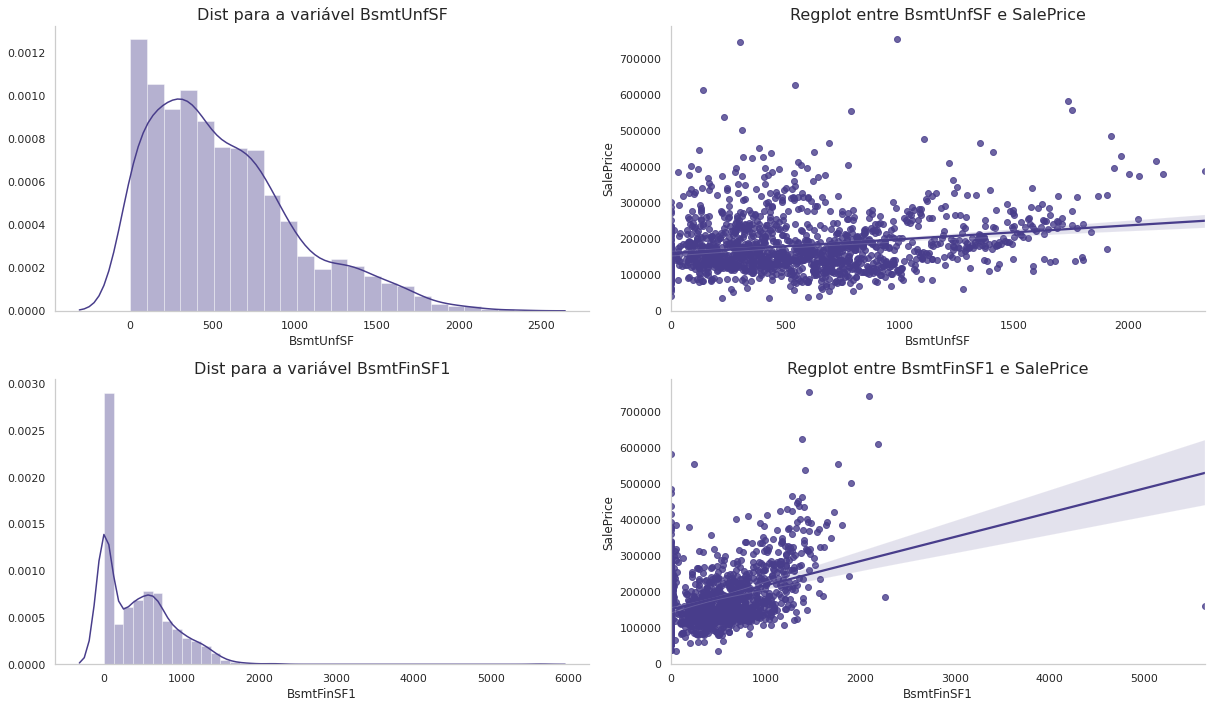

In [20]:
plot_multiple_dist_scatterplot(df=df, col_list=['BsmtUnfSF', 'BsmtFinSF1'], y_col='SalePrice')

A figura acima traz uma relação de duas variáveis relacionadas ao porão, sendo elas:

* **_BsmtUnfSF_**:	Área do porão sem acabamento;
* **_BsmtFinSF1_**:	Área coberta pelo acabamento do tipo 1 (atributo BsmtFinType1)

Cruzando a análise de distribuição com a variável target (`SalePrice`), é possível perceber o efeito da feature `BsmtFinSF1` no preço geral do imóvel. Em tese, isso indica que, quanto maior a área de aplicação de um determinado acabamento (aqui definido simplesmente como "tipo 1", mais caro tende a ser a casa.

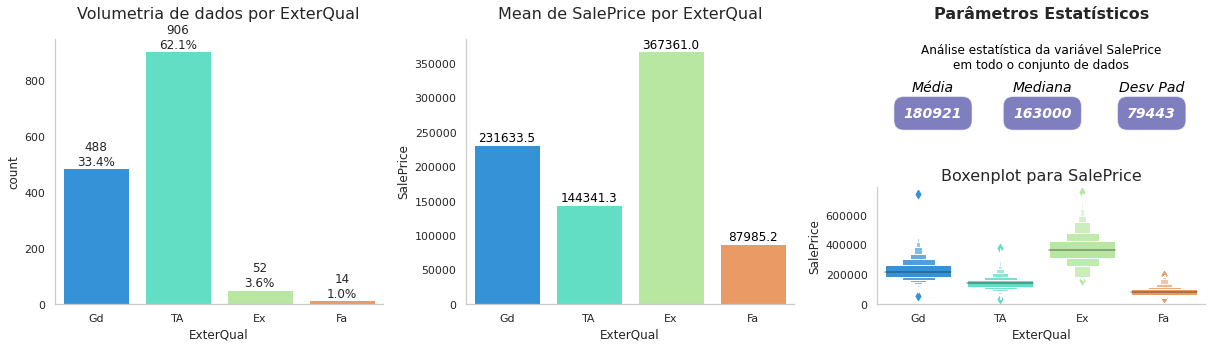

In [21]:
plot_cat_aggreg_report(df=df, cat_col='ExterQual', value_col=TARGET, dist_kind='boxen')

Na plotagem acima, é realizada uma análise na qualidade externa do imóvel como uma forma de simular seu respectivo preço. Apesar de termos uma maioria de imóveis registrados com as qualidades `Gd` (bom) e `TA`, os imóveis com qualidade externa do tipo `Ex` (excelentes) possuem o maior valor médio.

Esse tipo de tendência se repete para as demais variáveis categóricas de qualidade que, de certa forma, discretizam o nível de alguns setores do imóvel (ou do imóvel propriamente dito), sendo os casos das features `KitchenQual` e `GarageQual`, plotados abaixo.

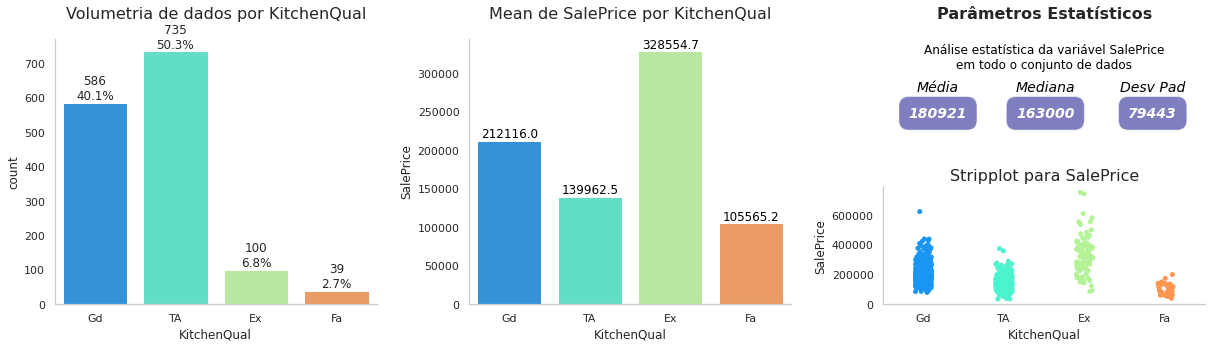

In [22]:
plot_cat_aggreg_report(df=df, cat_col='KitchenQual', value_col=TARGET, dist_kind='strip')

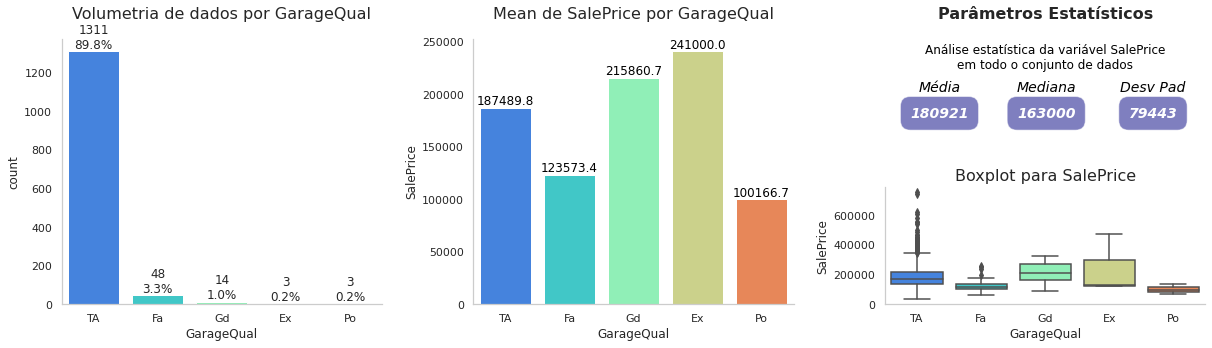

In [23]:
plot_cat_aggreg_report(df=df, cat_col='GarageQual', value_col=TARGET, dist_kind='box')

## Variáveis de Localização do Imóvel

Por fim, finalizando a sessão exploratória da base de dados, vamos analisar o último bloco de variáveis relacionados a localização do imóvel. Composto por apenas 4 features, este é um grupo extremamente pequeno. Suas variáveis indicam basicamente alguma questão relacionada a zona geográfica do imóvel.

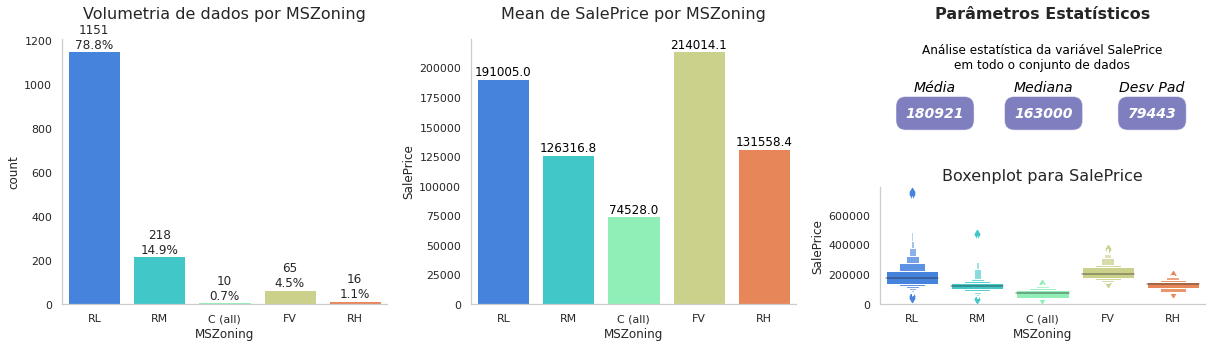

In [24]:
location_cols = ['MSZoning', 'Neighborhood', 'Condition1', 'Condition2']

plot_cat_aggreg_report(df=df, cat_col='MSZoning', value_col=TARGET, dist_kind='boxen')

Dessa forma, encerrando a análise exploratória, temos uma relação agregada e estatística com a variável `MSZoning`, sendo possível observar como essa variável impacta no preço final do imóvel. A seguir, vamos iniciar os estudos relacionados a preparação final da base.

# Prep: Construção de Pipelines 

Após uma extensa jornada em plotagens gráficas visando um melhor entendimento da base de dados disponível para uso, é chegado o momento de iniciar os passos referentes a construção de pipelines de preparação de dados visando o treinamento de modelos preditivos.

Nessa etapa, serão utilizadas funcionalidades do módulo `pycomp.ml.transformers` que, por sua vez, contém classes prontas e transformadores pré-desenvolvidos para a utilização em pipelines de dados. Dessa forma, é possível utilizar componentes já programados para a orquestração de fluxos de preparação dentro do contexto do projeto. 

## Pipeline Inicial

Em um primeiro momento, será proposta a construção de um pipeline inicial contendo classes aplicadas em toda a base de dados. O objetivo desse pipeline é aplicar transformações comuns a base bruta recebida, além de facilitar a podagem inicial das features presentes na base.

### Feature Selection

O primeiro passo a ser dado na fase de preparação dos dados envolve o processo de `feature selection`. Nem todas as colunas presentes na base possuem relevância dentro do objetivo de treinamento do modelo preditivo. Nessa etapa, será realizado um processo de filtragem das colunas a partir da classe `FiltraColunas()` do módulo `pycomp.ml.transformers`.

Em termos de objetivo, serão eliminadas, inicialmente, as colunas `Condition2` e `RoofMatl` da base original pois, de certa forma, são colunas que trazem uma quantidade extremamente desigual de volumetrias em suas colunas categóricas. O gráfico abaixo mostra uma visão de volumetria dessas duas colunas, exemplificando assim os motivos que nos fizeram decidir por suas exclusões.

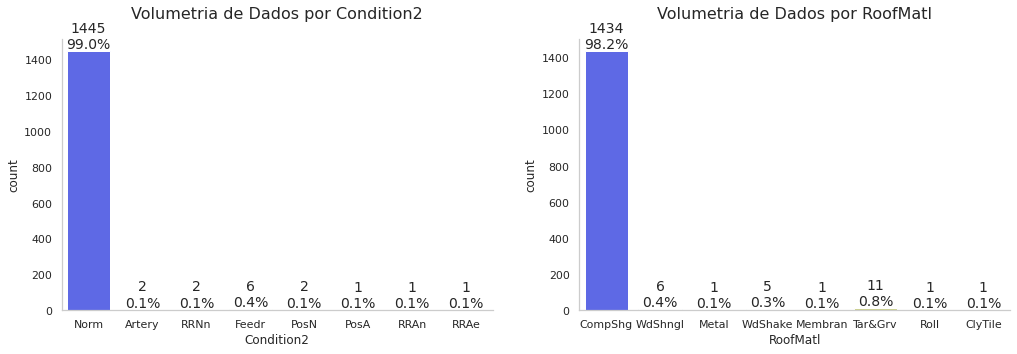

In [25]:
# Analisando volumetrias das colunas a serem eliminadas
TO_DROP = ['Condition2', 'RoofMatl']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
plot_countplot(df=df, col='Condition2', ax=axs[0])
plot_countplot(df=df, col='RoofMatl', ax=axs[1])

Através dos gráficos acima, percebe-se que as colunas `Condition2` e `RoofMatl` são praticamente compostas por valores únicos, ou seja, mais de 98% de suas entradas pertencem a uma único valor categórico. Pelo fato de serem praticamente constantes, tais variáveis não possuem valor pra um possível modelo preditivo e, portanto, podem ser eliminadas da base inicial.

In [49]:
# Importando classe
from pycomp.ml.transformers import FiltraColunas

# Criando cópia do DataFrame original
df_tmp = df.copy()

# Parâmetros iniciais de seleção de features
TARGET = 'SalePrice'
TO_DROP = ['Condition2', 'RoofMatl']
INITIAL_FEATURES = [col for col in df_tmp.columns if col not in TO_DROP]

# Contruindo classe para aplicação de feature selection
selector = FiltraColunas(features=INITIAL_FEATURES)
df_slct = selector.fit_transform(df_tmp)

# Verificando resultados
print(f'Dimensões antes da seleção de features: {df_tmp.shape}')
print(f'Dimensões após a seleção de features: {df_slct.shape}')

Dimensões antes da seleção de features: (1460, 82)
Dimensões após a seleção de features: (1460, 80)


Através da execução do método `fit_transform()` da classe `FiltraColunas()`, percebe-se a eliminação das duas colunas definidas anteriormente.

### Agrupamento Categórico

Um fato comum a datasets com um grande número de colunas é a presença de features categóricas com diversas entradas distintas. Sabe-se que as variáveis categóricas devem, em algum momento do pipeline de preparação, passar por um processo de `encoding`, sendo este responsável pela distribuição de entradas categóricas em colunas.

Em um cenário de variáveis com muitas entradas, é possível encontrar inconsistência de features após a aplicação do `encoding`, principalmente em casos de variáveis com algumas entredas extremamente não representativas (como no exemplo das variáveis `Condition2` e `RoofMatl` analisadas acima).

Para isso, vamos separar algumas variáveis categóricas que se enquadram neste cenário de muitas entradas distintas e aplicar a classe `AgrupamentoCategorico()` do pacote `pycomp` para agrupar as minorias.

In [50]:
# Importando classe
from pycomp.ml.transformers import AgrupamentoCategorico
from sklearn.pipeline import Pipeline

# Variáveis categóricas submetidas a agrupamento de entradas
N_CAT = 5
HIGH_CAT_FEATURES = data_overview(df=df_tmp).query('qtd_cat > @N_CAT + 1')['feature'].values
HIGH_CAT_FEATURES = [col for col in HIGH_CAT_FEATURES if col not in TO_DROP]
CAT3_FEATURES = ['Functional', 'SaleType']
CAT8_FEATURES = ['Neighborhood']
CAT5_FEATURES = ['HouseStyle', 'Condition1', 'Exterior2nd', 'Exterior1st']
OTHER_TAG = 'Other'

# Aplicando agrupamento
cat3_agrup = AgrupamentoCategorico(features=CAT3_FEATURES, n_cat=3, other_tag=OTHER_TAG)
cat5_agrup = AgrupamentoCategorico(features=CAT5_FEATURES, n_cat=5, other_tag=OTHER_TAG)
cat8_agrup = AgrupamentoCategorico(features=CAT8_FEATURES, n_cat=8, other_tag=OTHER_TAG)
cat_agrup_pipeline = Pipeline([
    ('cat3_agrup', cat3_agrup),
    ('cat5_agrup', cat5_agrup),
    ('cat8_agrup', cat8_agrup)
])

df_cat_agrup = cat_agrup_pipeline.fit_transform(df_slct)

Para validar o sucesso da execução da classe de agrupamento categórico, vamos analisar, através de `countplots()`, o cenário de entradas distintas do set de variáveis definidos pelo objeto `HIGH_CAT_FEATURES` **antes** e **depois** da aplicação da classe.

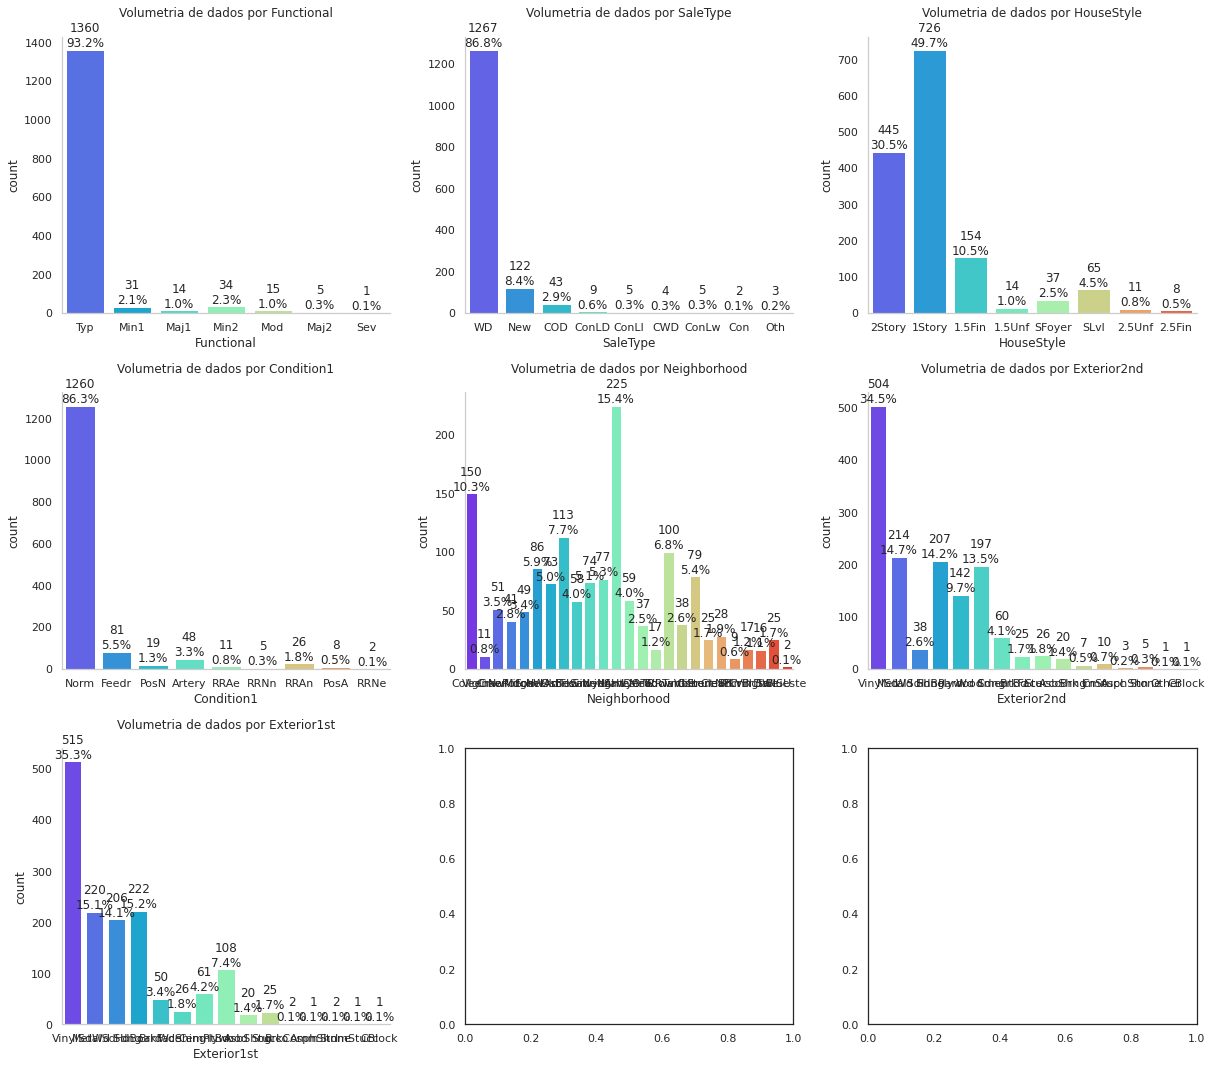

In [51]:
# Analisando resultados
plot_multiple_countplots(df=df_tmp, col_list=HIGH_CAT_FEATURES)

Após a aplicação da classe, temos:

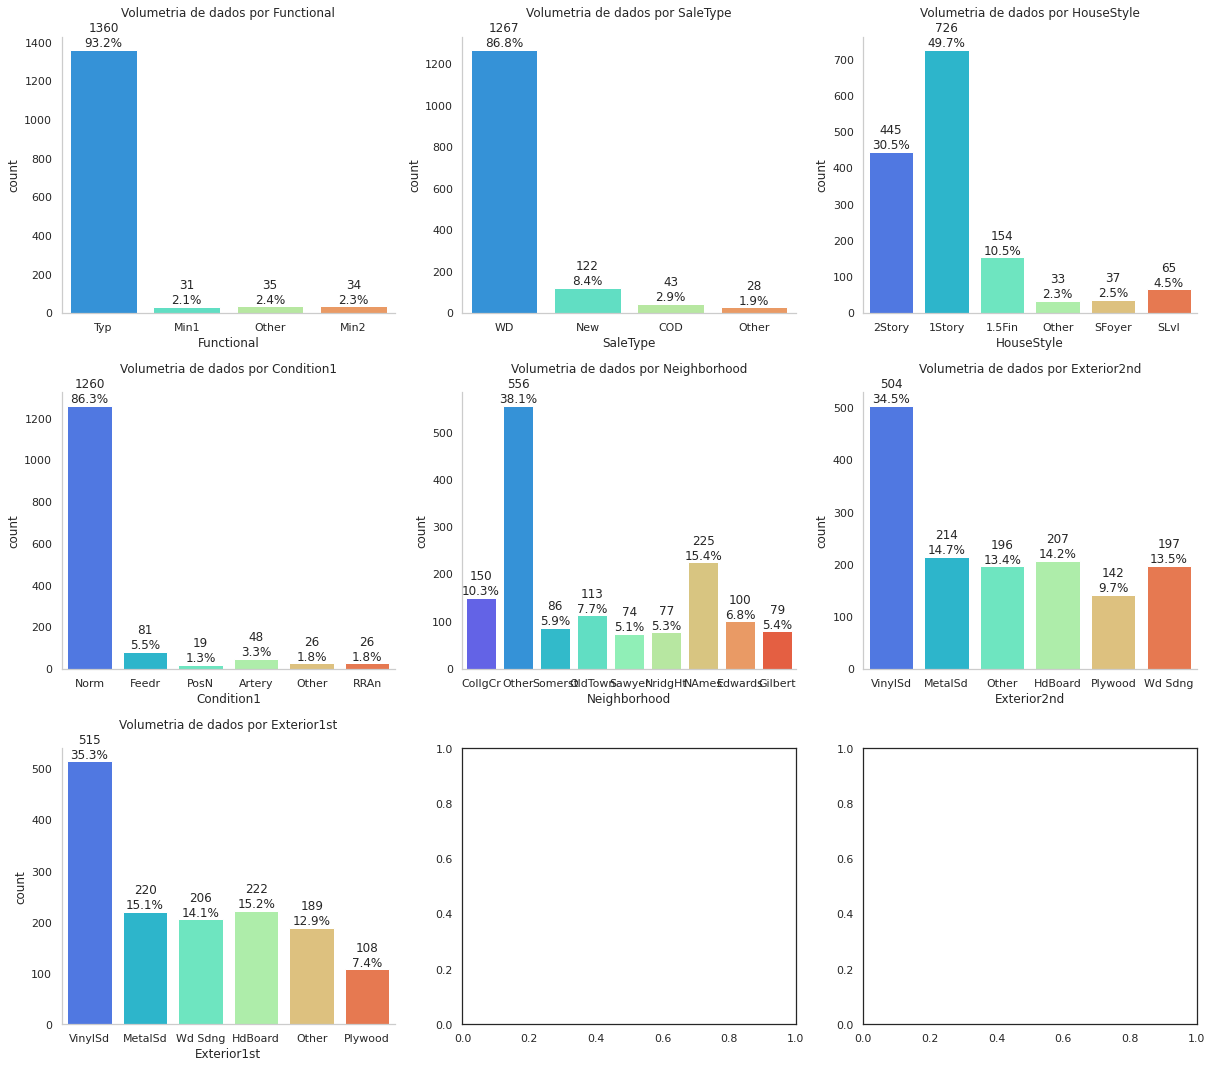

In [52]:
# Analisando resultados
plot_multiple_countplots(df=df_cat_agrup, col_list=HIGH_CAT_FEATURES)

Assim, percebe-se a aparição da categoria `Other` (definida pelo argumento `other_cat` da classe) como um agrupamento adicional das entradas categóricas de menor representatividade dentro de cada coluna. Isso facilitará a separação dos dados e o próprio treinamento de modelos preditivos.

### Dados Duplicados

O tratamento de dados duplicados é um importante passo na preparação da base para o treinamento de modelos. Isso pois, eliminar duplicatas significa, também, eliminar redundância na base, permitindo aos modelos de machine learning uma convergência mais rápida aos mínimos locais/globais.

Para realizar essa tarefa, será utilizada a classe `EliminaDuplicatas` do módulo `pycomp.ml.transformers` que, por sua vez, é responsável por simplesmente eliminar os registros duplicados de uma base de dados passada como input.

In [53]:
# Importing class
from pycomp.ml.transformers import EliminaDuplicatas

# Applying transformer
dup_dropper = EliminaDuplicatas()
df_nodup = dup_dropper.fit_transform(df_cat_agrup)

# Results
print(f'Total of duplicates before: {df_cat_agrup.duplicated().sum()}')
print(f'Total of duplicates after: {df_nodup.duplicated().sum()}')

Total of duplicates before: 0
Total of duplicates after: 0


### Dados de Treino e de Teste

Finalizando o que poderíamos chamar de _pipeline inicial_ do projeto, temos um passo importante responsável por separar a base de dados em treino e teste. Pensando em um futuro passo de modelagem, avaliar o resultado em diferentes bases é extremamente importante para tomar decisões a respeito da melhor solução prática a ser colocada em produção.

Para isso, utilizaremos a classe `SplitDados` também do módulo `pycomp.ml.transformers` que, por sua vez, aplica essa separação na base e nos retorna dados de treino e teste devidamente separados.

In [54]:
# Importing class
from pycomp.ml.transformers import SplitDados

# Applying transformer
splitter = SplitDados(target=TARGET)
X_train, X_test, y_train, y_test = splitter.fit_transform(df_nodup)

# Results
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (1168, 79)
Shape of X_test: (292, 79)
Shape of y_train: (1168,)
Shape of y_test: (292,)


Assim, é possível então construir um `Pipeline` que consolide todas essas etapas em um único bloco transformador, sendo este usado, posteriormente, para aplicar os passos de transformação de forma sequencial em novas bases de dados recebidas. O bloco abaixo cria e executa um pipeline que aplica os processos de feature selection, agrupamento categórico e separação de dados em _treino_ e _teste_.

### Construindo Pipeline Inicial

In [65]:
# Building a initial pipeline
from sklearn.pipeline import Pipeline

tmp_pipeline = Pipeline([
    ('selector', FiltraColunas(features=INITIAL_FEATURES)),
    ('cat_agrup', Pipeline([
        ('cat3_agrup', AgrupamentoCategorico(features=CAT3_FEATURES, n_cat=3, other_tag=OTHER_TAG)),
        ('cat5_agrup', AgrupamentoCategorico(features=CAT5_FEATURES, n_cat=5, other_tag=OTHER_TAG)),
        ('cat8_agrup', AgrupamentoCategorico(features=CAT8_FEATURES, n_cat=8, other_tag=OTHER_TAG))
    ])),
    ('splitter', SplitDados(target=TARGET))
])

# Applying this pipeline into the original data
X_train, X_test, y_train, y_test = tmp_pipeline.fit_transform(df)
print(f'Shape of original dataset: {df.shape}')
print(f'Shape of X_train: {X_train.shape}')

Shape of original dataset: (1460, 82)
Shape of X_train: (1168, 79)


Porém, é extremamente importante ressaltar que, pela natureza da classe `AgrupamentoCategorico`, as entradas menos representativas são automaticamente agrupadas em uma nova entrada definida pela variável `OTHER_TAG`. Dessa forma, é possível perceber que, considerando novas bases de dados recebidas, nem sempre as mesmas volumetrias e proporções serão as mesmas para as entradas categóricas das colunas definidas em `HIGH_CAT_FEATURES`. Em outras palavras, de acordo com a base de dados passada como input, é possível obter sets diferentes de features, uma vez que as volumetrias variam de conjunto pra conjunto.

Exemplificando, é possível que, considerando uma base "A" fictícia, a entrada "TAG 1" (também fictítica) pode ter uma volumetria altamente representativa, sendo considerada como uma entrada relevante pela classe `AgrupamentoCategorico()` que, por sua vez, leva em consideração o resultado ordenado obtido pelo método `value_counts()`. Por outro lado, em uma base "B" fictícia, essa mesma entrada "TAG 1" pode apresentar um volume muito baixo e, dessa forma, será automaticamente agrupada dentro da entrada definida por `OTHER_TAG` e, por consequência, ficando fora do conjunto final, ocasionando assim um erro durante a utilização dessa base nos passos subsequentes.

Para mitigar esse problema, é possível "fixar" as entradas categóricas consideradas no grupo inicial dentro de cada feature da base. Simplificando, cria-se um dicionário com a relação de entradas pra cada coluna, sendo este utilizado para uma transformação oficial e definitiva em qualquer base de dados, garantindo assim que as mesmas entradas categóricas serão consideradas, da mesma forma que as mesmas entradas categóricas pouco representativas serão agrupadas na variável `OTHER_TAG`.

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

class AgrupamentoCategoricoFinal(BaseEstimator, TransformerMixin):
    """
    Classe responsável por realizar um agrupamento categórico definitivo nas variáveis
    O método fit_transform() é herdado dos objetos BaseEstimator e TransformerMixin

    Parâmetros
    ----------
    :param cat_dict: dicionário com a relação de colunas e entradas [type: dict]
    :param other_tag: categoria referente às demais entradas [type: string, default='Other']

    Retorno
    ------
    :return: df: DataFrame após o agrupamento categórico [type: pandas.DataFrame]

    Aplicação
    ---------
    cat_agrup = AgrupamentoCategoricoFinal(cat_dict=cat_dict, other_tag=OTHER_TAG)
    df_prep = cat_agrup.fit_transform(df)
    """
    
    def __init__(self, cat_dict, other_tag='Other'):
        self.cat_dict = cat_dict
        self.other_tag = other_tag
        
    def fit(self, df, y=None):
        return self
    
    def transform(self, df, y=None):
        # Iterando sobre dicionário e transformando entradas das colunas
        for col, cats in self.cat_dict.items():
            df[col] = df[col].apply(lambda x: x if x in cats else self.other_tag)
            
        return df

In [64]:
# Definindo dicionário de entradas categóricas
high_cat_dict = {}
for feature in HIGH_CAT_FEATURES:
    high_cat_dict[feature] = [col for col in X_train[feature].value_counts().index if col != OTHER_TAG]
high_cat_dict

{'Functional': ['Typ', 'Min2', 'Min1'],
 'SaleType': ['WD', 'New', 'COD'],
 'HouseStyle': ['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer'],
 'Condition1': ['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN'],
 'Neighborhood': ['NAmes',
  'CollgCr',
  'OldTown',
  'Edwards',
  'Somerst',
  'Gilbert',
  'NridgHt',
  'Sawyer'],
 'Exterior2nd': ['VinylSd', 'Wd Sdng', 'MetalSd', 'HdBoard', 'Plywood'],
 'Exterior1st': ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood']}

Após a construção de um dicionário definitivo de entradas categóricas das variáveis presentes em `HIGH_CAT_FEATURES`, é possível construir um novo pipeline definitivo considerando esse transformador de agrupamento categórico ao invés do transformador utilizado anteriormente.

In [67]:
# Building a definitive initial pipeline
initial_pipeline = Pipeline([
    ('selector', FiltraColunas(features=INITIAL_FEATURES)),
    ('cat_agrup', AgrupamentoCategoricoFinal(cat_dict=high_cat_dict, other_tag=OTHER_TAG)),
    ('splitter', SplitDados(target=TARGET))
])

# Applying this pipeline into the original data
X_train, X_test, y_train, y_test = initial_pipeline.fit_transform(df)
print(f'Shape of original dataset: {df.shape}')
print(f'Shape of X_train: {X_train.shape}')

Shape of original dataset: (1460, 82)
Shape of X_train: (1168, 79)
